# Calculus and Differential Equations
- Working with polynomials and calculus
- Differentiating and integrating symbolically using SymPy
- Solving equations
- Integrating functions numerically using SciPy
- Solving simple differential equations numerically
- Solving systems of differential equations
- Solving partial differential equations numerically
- Using discrete Fourier transforms for signal processing.

## Working with polynomials and Calculus

In [2]:
class Polynomial:
    """Basic polynomial class"""

    def __init__(self, coeffs):
        self.coeffs = coeffs

    def __repr__(self):
        return f"Polynomial({repr(self.coeffs)})"

    def __call__(self, x) -> int:
        return sum([coeff*x**i for i, coeff in enumerate(self.coeffs)])

    def differentiate(self):
        """Differentiate the polynomial and return a new polynomial"""
        return Polynomial([i*coeff for i, coeff in enumerate(self.coeffs[1:], start=1)])

    def integrate(self):
        """Integrate the polynomial and return a new polynomial"""
        return Polynomial([coeff/i for i, coeff in enumerate(self.coeffs, start=1)])


In [3]:
p = Polynomial([1, -2, 1])
diff = p.differentiate()
print(diff)

integ = p.integrate()
print(integ)

Polynomial([-2, 2])
Polynomial([1.0, -1.0, 0.3333333333333333])


## Differentiating and integrating symbolically using SymPy

In [4]:
# Symbolic calculation: The most basic use case of sympy is to perform symbolic calculations. For example, finding the value of a mathematical expression:
import sympy

x = sympy.Symbol('x')
y = sympy.Symbol('y')

expr = x + 2 * y

print(f"Expression: {expr}")
print(f"Value of expression for x=1 and y=2: {expr.evalf(subs={x:1, y:2})}")


Expression: x + 2*y
Value of expression for x=1 and y=2: 5.00000000000000


In [5]:
# Simplification: sympy can also simplify mathematical expressions:


expr = (x + y) ** 2

print(f"Expression: {expr}")
print(f"Simplified expression: {sympy.simplify(expr)}")


Expression: (x + y)**2
Simplified expression: (x + y)**2


In [6]:
# Solving equations: Another important use case of sympy is to solve equations. For example:
expr = x ** 2 - 4 * x + 4

print(f"Expression: {expr}")
print(f"Roots of the equation: {sympy.solve(expr)}")

Expression: x**2 - 4*x + 4
Roots of the equation: [2]


In [7]:
# Differentiation: sympy can also perform differentiation. For example, to find the derivative of a function:
expr = x ** 2 + y ** 2

print(f"Expression: {expr}")
print(f"Derivative with respect to x: {sympy.diff(expr, x)}")
print(f"Derivative with respect to y: {sympy.diff(expr, y)}")


Expression: x**2 + y**2
Derivative with respect to x: 2*x
Derivative with respect to y: 2*y


In [8]:
# Integration: sympy can perform symbolic integration:
expr = x ** 2

print(f"Expression: {expr}")
print(f"Antiderivative of the expression: {sympy.integrate(expr, x)}")


Expression: x**2
Antiderivative of the expression: x**3/3


In [9]:
# Define a function
f = x**3 + 2*x**2 + x + 1

# Find the definite integral of the function
a, b = 0, 1
integral = sympy.integrate(f, (x, a, b))
print(integral)


29/12


In [10]:
# Solving a system of linear equations

# Define the system of linear equations
eq1 = sympy.Eq(x + y, 4)
eq2 = sympy.Eq(x - y, 2)

# Solve the system of linear equations
sol = sympy.solve((eq1, eq2), (x, y))
print(sol)


{x: 3, y: 1}


## Solving equations

In [11]:
from scipy import optimize
from math import exp


def f(x):
    return x*(x-2)*exp(3-x)


def fp(x):
    return -(x**2 - 4*x + 2) * exp(3 - x)


print(optimize.newton(f, 1, fprime=fp))
print(optimize.newton(f, 1., x1=1.5))


2.0
1.9999999999999862


In [12]:
from math import copysign


def bisect(f, a, b, tol=1e-5):
    """Bisection method for root finding"""
    fa, fb = f(a), f(b)
    assert not copysign(fa, fb) == fa, "Function must change signs"
    while (b-a) > tol:
        m = (b-a)/2
        fm = f(m)
        if fm == 0:
            return m
        if copysign(fm, fa) == fm:
            a = m
            fa = fm
        else:
            b = m
        return a


In [13]:
optimize.brentq(f, 1.0, 3.0)


1.9999999999998792

## Integrating functions numerically using SciPy

In [14]:
from scipy import integrate

In [15]:
import numpy as np

def erf_integrand(t):
   return np.exp(-t**2)

In [16]:
val_quad, err_quad = integrate.quad(erf_integrand, -1.0, 1.0)
print(val_quad, err_quad)


1.493648265624854 1.6582826951881447e-14


In [17]:
val_quad, err_quad = integrate.quadrature(erf_integrand, -1.0, 1.0)
print(val_quad, err_quad)

1.4936482656450036 7.459892703565174e-10


## Solving simple differential equations numerically

In [18]:
def f(t, y):
    return -0.2*y


t_range = (0, 5)
T0 = np.array([50.])


def true_solution(t):
    return 50. * np.exp(-0.2*t)


Text(0.5, 1.0, 'Error in approximation')

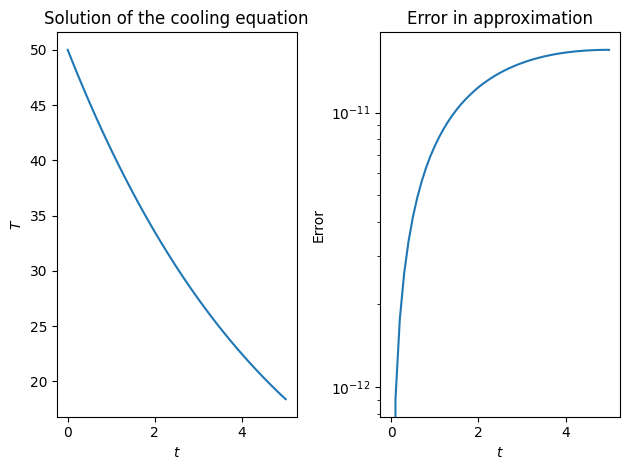

In [19]:
sol = integrate.solve_ivp(f, t_range, T0, max_step= 0.1)

t_vals = sol.t 
T_vals = sol.y[0,:]

import matplotlib.pyplot as plt  
fig, (ax1, ax2) = plt.subplots(1,2, tight_layout=True)
ax1.plot(t_vals, T_vals)
ax1.set_xlabel("$t$")
ax1.set_ylabel("$T$")
ax1.set_title("Solution of the cooling equation")

err = np.abs(T_vals - true_solution(t_vals))

ax2.semilogy(t_vals, err)
ax2.set_xlabel("$t$")
ax2.set_ylabel("Error")
ax2.set_title("Error in approximation")

## Solving systems of differential equations

Here we will analyze a simple system of differential equations and use the Scipy integrate module to obtain approximate solutions. The tools for solving a system of DE using Python are the same as those for solving a single equation. We again use the solve_ivp routine from the integrate module in SciPy.

In [20]:
from typing import List
# A function that holds system of equations.


def predator_prey_system(t: int, y: List[int]):
    return np.array([5 * y[0] - 0.1 * y[0], 0.1 * y[1] - 6 * y[1]])


Text(0, 0.5, 'W')

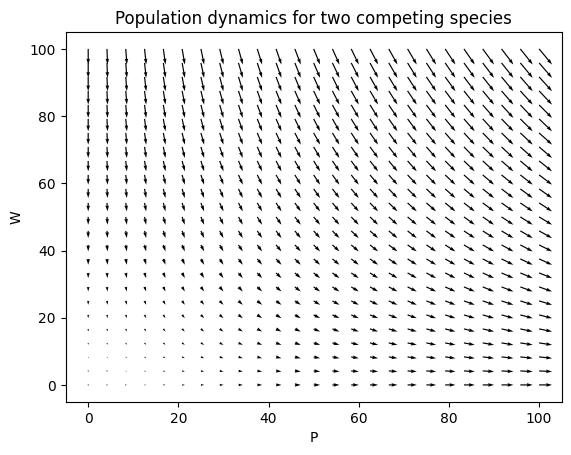

In [25]:
# A plot that would describe how the populations will evolve-given the equations at numerous starting populations.
p = np.linspace(0, 100, 25)
w = np.linspace(0, 100, 25)
P, W = np.meshgrid(p, w)

dp, dw = predator_prey_system(0, np.array([P, W]))

fig, ax = plt.subplots()
ax.quiver(P, W, dp, dw)
ax.set_title("Population dynamics for two competing species")
ax.set_xlabel("P")
ax.set_ylabel("W")


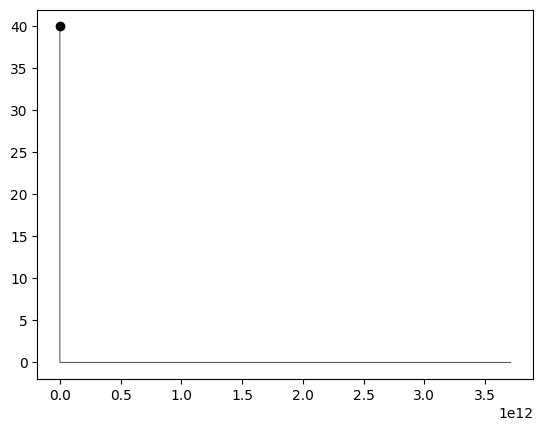

In [24]:
# initial conditions
initial_conditions = np.array([85, 40])

sol = integrate.solve_ivp(predator_prey_system, (0., 5.),
                          initial_conditions, max_step=0.1)

fig, ax = plt.subplots()
ax.plot(initial_conditions[0], initial_conditions[1], "ko")
ax.plot(sol.y[0, :], sol.y[1, :], "k", linewidth=0.5)

## Solving partial differential equations numerically

In [26]:
from mpl_toolkits import mplot3d

In [27]:
alpha = 1
x0 = 0  # left hand x limit
xL = 2  # Right hand x limit

N = 10
x = np.linspace(x0, xL, N+1)
h = (xL - x0)
k = 0.01
steps = 100
t = np.array([i*k for i in range(steps+1)])

r = alpha*k / h**2
assert r < 0.5, f"Must have r < 0.5, currently r={r}"

Text(0.5, 0, 'u')

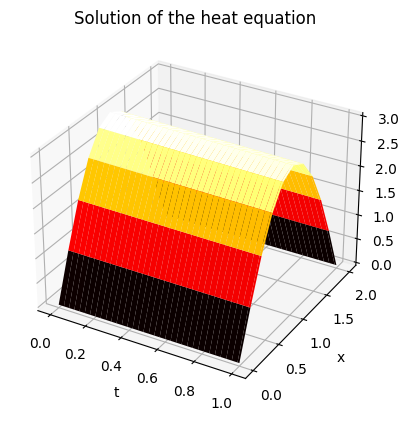

In [28]:
from scipy import sparse
diag = [1, *(1-2*r for _ in range(N-1)), 1]
abv_diag = [0, *(r for _ in range(N-1))]
blw_diag = [*(r for _ in range(N-1)), 0]
A = sparse.diags([blw_diag, diag, abv_diag], (-1, 0, 1),
                 shape=(N+1,
                        N+1), dtype=np.float64, format="csr")

u = np.zeros((steps+1, N+1), dtype=np.float64)


def initial_profile(x):
    return 3*np.sin(np.pi*x/2)


u[0, :] = initial_profile(x)
for i in range(steps):
    u[i+1, :] = A @ u[i, :]

X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(T, X, u, cmap="hot")
ax.set_title("Solution of the heat equation")
ax.set_xlabel("t")
ax.set_ylabel("x")
ax.set_zlabel("u")


## Using discrete Fourier transforms for signal processing.

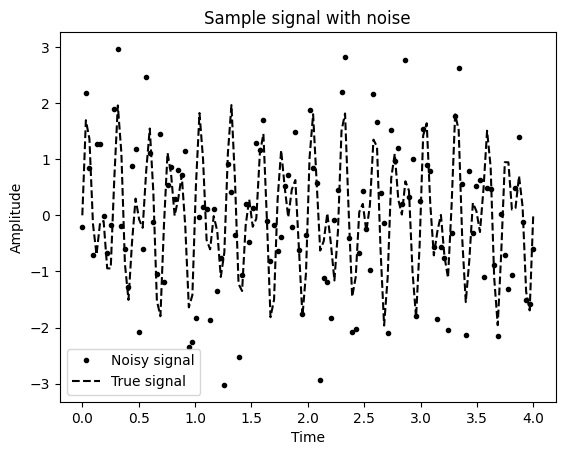

In [30]:
from numpy import fft


def signal(t, freq_1=4.0, freq_2=7.0):
    return np.sin(freq_1 * 2 * np.pi * t) + np.sin(freq_2 * 2 *
                                                   np.pi * t)

    
state = np.random.RandomState(12345)
sample_size = 2**7  # 128
sample_t = np.linspace(0, 4, sample_size)
sample_y = signal(sample_t) + state.standard_normal(sample_size)
sample_d = 4./(sample_size - 1)  # Spacing for linspace array
true_signal = signal(sample_t)


fig1, ax1 = plt.subplots()
ax1.plot(sample_t, sample_y, "k.", label="Noisy signal")
ax1.plot(sample_t, signal(sample_t), "k--", label="True signal")
ax1.set_title("Sample signal with noise")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax1.legend()


Text(0, 0.5, 'Density')

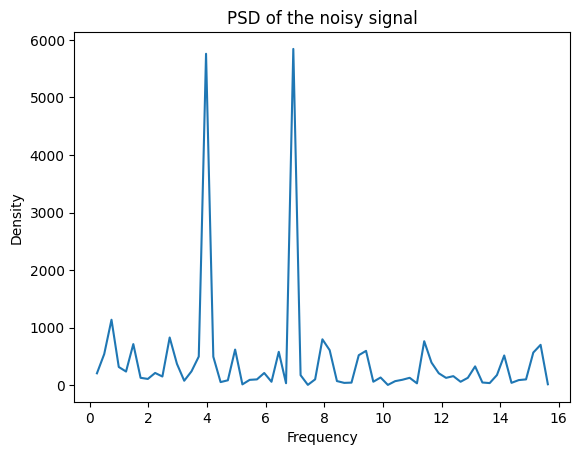

In [32]:
spectrum = fft.fft(sample_y)
freq = fft.fftfreq(sample_size, sample_d)
pos_freq_i = np.arange(1, sample_size//2, dtype=int)

psd = np.abs(spectrum[pos_freq_i])**2 + np.abs(spectrum[-
                                                        pos_freq_i])**2

fig2, ax2 = plt.subplots()
ax2.plot(freq[pos_freq_i], psd)
ax2.set_title("PSD of the noisy signal")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Density")


Text(0, 0.5, 'Amplitude')

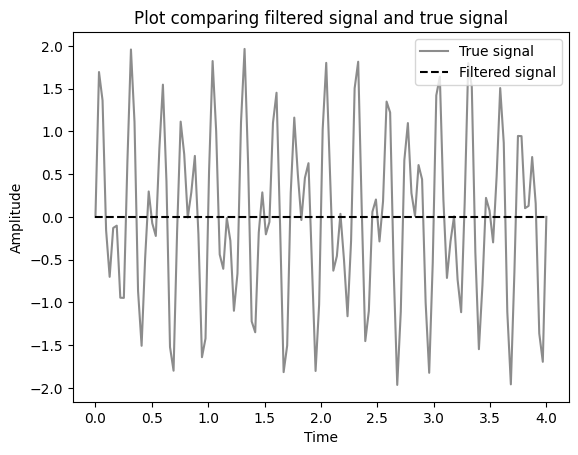

In [33]:
filtered = pos_freq_i[psd > 1e4]

new_spec = np.zeros_like(spectrum)
new_spec[filtered] = spectrum[filtered]
new_spec[-filtered] = spectrum[-filtered]

new_sample = np.real(fft.ifft(new_spec))

fig3, ax3 = plt.subplots()
ax3.plot(sample_t, true_signal, color="#8c8c8c", linewidth=1.5,
         label="True signal")
ax3.plot(sample_t, new_sample, "k--", label="Filtered signal")
ax3.legend()
ax3.set_title("Plot comparing filtered signal and true signal")
ax3.set_xlabel("Time")
ax3.set_ylabel("Amplitude")
